In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PyPDF2 import PdfMerger
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv("/content/drive/MyDrive/Negotiation Paper/year plot.csv")


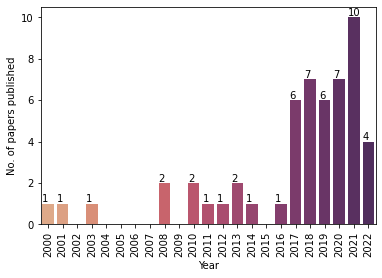

In [14]:
ax = sns.barplot(x="Year", y="No. of papers published", data=df, palette="flare")
for p, label in zip(ax.patches, df["No. of papers published"]):
    if label!=0:
      ax.annotate(label, (p.get_x(), p.get_height()+0.08))
ax.grid(False)


plt.xticks(rotation = 90)
plt.savefig('year.pdf')

In [15]:
df1 = pd.read_csv("/content/drive/MyDrive/Negotiation Paper/venue.csv")

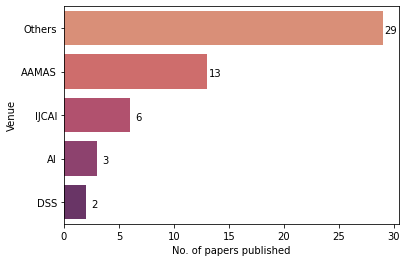

In [16]:
#sns.set_theme(style="whitegrid")
ax = sns.barplot(x="No. of papers published", y="Venue",  data=df1, palette="flare")
#ax.grid(False)
for p in ax.patches:
    width = p.get_width()
    plt.text(0.75+p.get_width(), p.get_y()+0.55*p.get_height(),
             int(width),
             ha='center', va='center')
plt.savefig('venue.pdf')

In [18]:
pdfs = ['year.pdf', 'venue.pdf']

merger = PdfMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("barcharts.pdf")
merger.close()